<a href="https://colab.research.google.com/github/ritamghoshritam/MachineLearningDemo/blob/main/WeatherPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
dataset= pd.read_csv('weather.csv')
print(dataset.shape)

(366, 22)


In [ ]:
print(dataset.describe())

          MinTemp     MaxTemp    Rainfall  ...     Temp9am     Temp3pm     RISK_MM
count  366.000000  366.000000  366.000000  ...  366.000000  366.000000  366.000000
mean     7.265574   20.550273    1.428415  ...   12.358470   19.230874    1.428415
std      6.025800    6.690516    4.225800  ...    5.630832    6.640346    4.225800
min     -5.300000    7.600000    0.000000  ...    0.100000    5.100000    0.000000
25%      2.300000   15.025000    0.000000  ...    7.625000   14.150000    0.000000
50%      7.450000   19.650000    0.000000  ...   12.550000   18.550000    0.000000
75%     12.500000   25.500000    0.200000  ...   17.000000   24.000000    0.200000
max     20.900000   35.800000   39.800000  ...   24.700000   34.500000   39.800000

[8 rows x 17 columns]


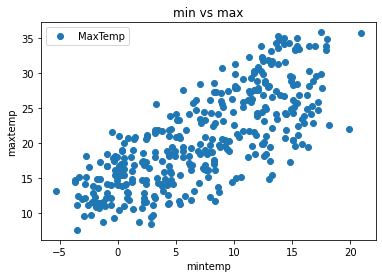

In [ ]:
dataset.plot(x='MinTemp', y='MaxTemp' , style='o')
plt.title('min vs max')
plt.xlabel('mintemp')
plt.ylabel('maxtemp')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


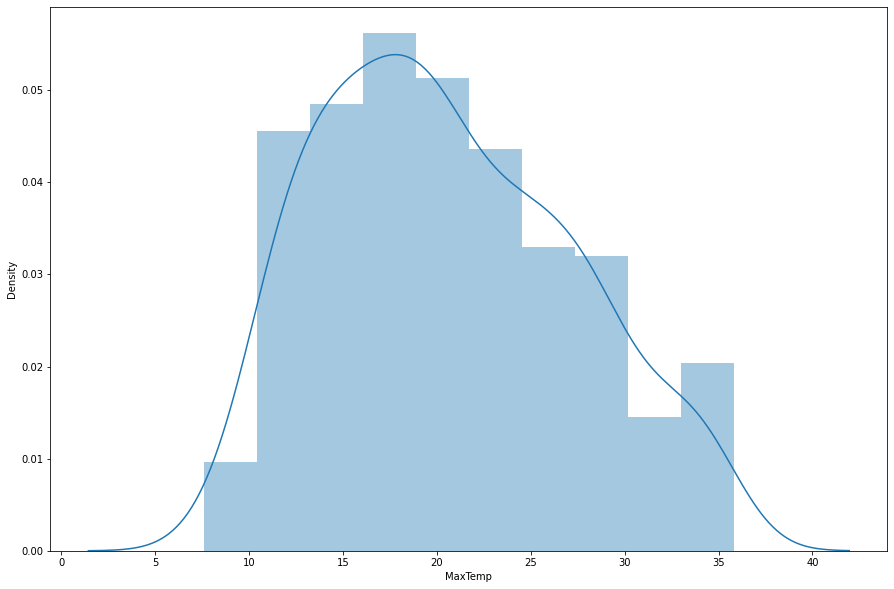

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['MaxTemp'])
plt.show()

In [ ]:
X= dataset['MinTemp'].values.reshape(-1,1)
y= dataset['MaxTemp'].values.reshape(-1,1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
model =LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Intercept is :',model.intercept_)

Intercept is : [14.56202411]


In [ ]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [[0.81953755]]


In [ ]:
y_pred= model.predict(X_test)

In [ ]:
df=  pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

    Actual  Predicted
0     25.2  23.413030
1     11.5  13.086857
2     21.1  27.264856
3     22.2  25.461874
4     20.4  26.937041
..     ...        ...
69    18.9  20.216833
70    22.8  27.674625
71    16.1  21.446140
72    25.1  24.970151
73    12.2  14.070302

[74 rows x 2 columns]


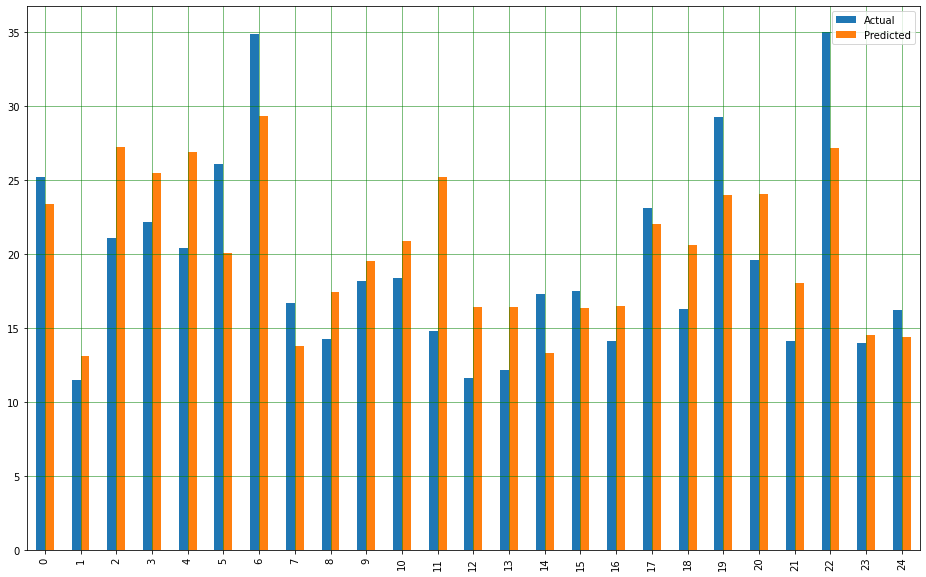

In [ ]:
df1= df.head(25)
df1.plot(kind='bar', figsize=(16,10))
plt.grid(which='major', linestyle='-',linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':',linewidth='0.5', color='black')
plt.show()



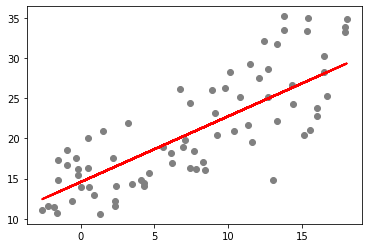

In [ ]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,y_pred,color='red',linewidth=2)
plt.show()


In [ ]:
print('Mean abolute error is:', metrics.mean_absolute_error(y_test,y_pred))
print('Mean squared error is:', metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error is:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean abolute error is: 3.5094353112899594
Mean squared error is: 17.011877668640622
Root mean squared error is: 4.124545753006096
